**KIDNEY  IMAGE CLASSIFICATION**

Machine learning is a field of study and is concerned with algorithms that learn from examples.

There are three types of machine learning, and they are:

*   Supervised Learning *where machine learning algorithm is trained on labeled data.*
*   Unsupervised Learning *where machine learning algorithm is trained to work without labeled data.*
*   Reinforced Learning *where the machine learning algorithm is trained to work bosed on a reward system.*


*  Image Classification is the task of assigning an input image, one label from a fixed set of categories.*

For this particular classification problem, because the dataset used had no labels, unsupervised learning was used to carry out the classification.

**The Dataset**

The dataset used for this classification was culled from https://www.kaggle.com/kmader/siim-medical-images?select=full_archive.npz and uploaded to google drive. The cell below indicates how the dataset was connected from google drive to colab.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#importing the python libraries

import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

the size of the data is 512 pixel hieght and 512 pixel width
the minimum pixel value is 0.0
the maximum pixel value is 1.0
the mean pixel value is 0.24456600114411003
the standard deviation pixel value is 0.21625740509547028


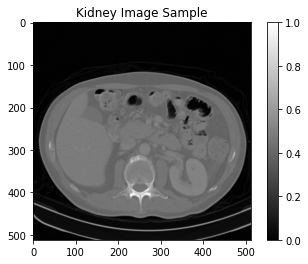

In [3]:
example_img_1 = imread(r'/content/gdrive/My Drive/KAGGLE DATASET/KIDNEY DATASET/image (1).png', as_gray= True)
plt.imshow(example_img_1, cmap=cm.gray)
plt.colorbar()
plt.title('Kidney Image Sample')
print(f"the size of the data is {example_img_1.shape[0]} pixel hieght and {example_img_1.shape[1]} pixel width")
print(f"the minimum pixel value is {example_img_1.min()}")
print(f"the maximum pixel value is {example_img_1.max()}")
print(f"the mean pixel value is {example_img_1.mean()}")
print(f"the standard deviation pixel value is {example_img_1.std()}")

plt.show()

In [4]:
example_img_1.shape

(512, 512)

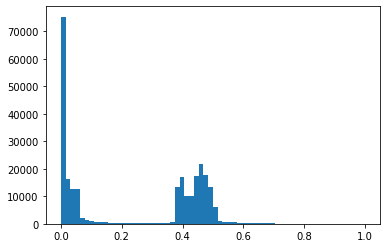

In [5]:
plt.hist(example_img_1.ravel(),64,[0,1])
plt.show()

From the histogram,it can be seen that the minimum pixel of the to be 0 and most of the pixel is around 0.the maximum pixel value is 1

**Data Exploration**



In [6]:
image_size = 512
def get_data(data_dir):
    data = []
    for img in os.listdir(data_dir):
        try:
            img_arr = imread(os.path.join(data_dir,img),as_gray=True)
            resized_arr = resize(img_arr,(image_size,image_size))
            data.append([img_arr])
        except Exception as e:
            print(e)
                
    return np.array(data)

In [7]:
image_features = get_data(r'/content/gdrive/My Drive/KAGGLE DATASET/KIDNEY DATASET/')

In [8]:
image_features.shape

(217, 1, 512, 512)

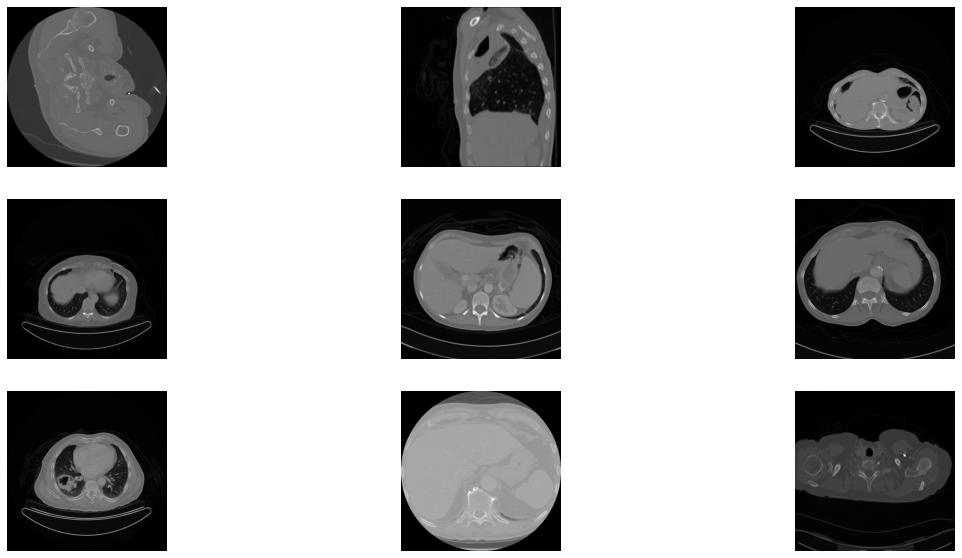

In [9]:
plt.figure(figsize=(20,10))

for i in range(9):
    num = np.random.randint(0, len(image_features)-1)
    plt.subplot(3,3,i+1)
    plt.imshow(image_features[num].reshape(image_features.shape[2],image_features.shape[3]), cmap='gray')
    plt.axis('off')

**Data Preparation**

This is the process of making the image dataset ready in such a way that it is easy for KMeans morel to associate pattern in the images. In order for KMeans to understand patterns in the image dataset,the features (pixels) extracted from the image dataset is first divided by 255 to scale the feature and then resized from 4D to 2D

In [10]:
image_features =  image_features/255.0
reshaped_feat = image_features.reshape(len(image_features),-1)
print(reshaped_feat.shape)

(217, 262144)


**K-Means Algorithm**

K-Means algorithm is an iterative algorithm that tries to partition a dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

For the classification of the kidney diseases, we were able to use the K-Means algorithm to partition the dataset into 6 groups to classify each kidney disease.

The way kmeans algorithm works is as follows:



1.   Specify number of clusters K.
2.   Initialize centroids by first shuffling the dataset and then randomly   selecting K data points for the centroids without replacement.
3.   Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

The approach kmeans follows to solve the problem is called Expectation-Maximization. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster.

**Mathemmatical Function**

$  1frac{|Ck|}∑i,i′ϵCk∑j=1p(xij−xi′j)2=2∑iϵCk∑j=1p(xij−x¯kj)2

In [11]:
def run_kmean(n):
    kmeans= KMeans(n_clusters=n, random_state=101)
    clusters = kmeans.fit_predict(reshaped_feat)
    print(f"The sil score for {n} cluster is {silhouette_score(reshaped_feat,clusters)}")

In [12]:
run_kmean(2)
run_kmean(3)
run_kmean(4)
run_kmean(5)
run_kmean(6)

The sil score for 2 cluster is 0.3027926019911817
The sil score for 3 cluster is 0.20731212631573978
The sil score for 4 cluster is 0.17966923326055864
The sil score for 5 cluster is 0.15213793992808244
The sil score for 6 cluster is 0.15301516988182454


In [13]:
kmeans= KMeans(n_clusters=6, random_state=101)

In [14]:
clusters = kmeans.fit_predict(reshaped_feat)
kmeans.cluster_centers_.shape

(6, 262144)

In [15]:
silhouette_score(reshaped_feat,clusters)

0.15301516988182454

**Silhouette Coefficient**

Silhouette Coefficient or Silhouette Score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

The following steps can be applied to calculate the sihouette coefficient of a single sample in our dataset:
*1. Calculate the cluster cohesion $${a^{(i)}}$$ as the average distance between a sample $${x^{(i)}}$$ and all other points in the same cluster

*2 calculate the cluster separation $${b^{(i)}}$$ from the next closest cluster as the average distance between the sample $${x^{(i)}}$$ and all samples in the nearest cluster.

*3 Calculate the silhouette $${s^{(i)}}$$ as the difference between cluster cohesion and separation divided by the greater of the two as shown below:

Mathematical expression

$$s = \frac{b^{(i)} - a^{(i)}}{max{[b^{(i)},a^{(j)}]}}$$

In [16]:
clusters

array([0, 5, 4, 0, 5, 0, 0, 5, 4, 0, 3, 3, 3, 5, 4, 4, 4, 3, 4, 5, 5, 5,
       5, 4, 0, 5, 4, 0, 5, 0, 0, 4, 4, 5, 0, 5, 5, 4, 4, 4, 5, 4, 5, 5,
       4, 4, 5, 4, 4, 4, 0, 0, 4, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 2, 4, 2,
       2, 2, 1, 2, 2, 1, 5, 2, 1, 1, 1, 2, 1, 5, 1, 5, 3, 1, 1, 1, 5, 5,
       1, 1, 1, 1, 1, 5, 5, 1, 4, 4, 4, 0, 1, 1, 1, 3, 3, 3, 4, 3, 1, 5,
       1, 5, 1, 4, 4, 5, 4, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 5, 4, 4, 2, 4,
       4, 1, 1, 2, 1, 5, 5, 2, 5, 1, 5, 5, 1, 1, 3, 5, 2, 2, 5, 2, 2, 2,
       2, 1, 1, 2, 2, 5, 2, 2, 2, 1, 1, 5, 5, 1, 5, 2, 2, 1, 1, 1, 5, 1,
       2, 2, 2, 4, 0, 4, 4, 5, 0, 3, 1, 2, 2, 1, 1, 2, 3, 1, 2, 4, 0, 4,
       2, 4, 2, 4, 0, 0, 0, 3, 4, 0, 4, 3, 3, 0, 4, 3, 4, 4, 4],
      dtype=int32)

In [17]:
g = len(np.unique(clusters))

cluster_index =[[] for i in range(g)]

for i,label in enumerate(clusters,0):
    for n in range(g):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
                   

def visualize_cluster(clust_num,num_to_view):       
    #plt.figure(figsize=(20,10))
    clust = clust_num

    num = num_to_view
    for i in range(num):
        #plt.subplot(3,3,i+1)
        plt.imshow(reshaped_feat[cluster_index[clust][i]].reshape(image_features.shape[2],image_features.shape[3]),cmap=cm.gray) 
        plt.show()

In [18]:
print(cluster_index)

[[0, 3, 5, 6, 9, 24, 27, 29, 30, 34, 50, 51, 99, 180, 184, 196, 202, 203, 204, 207, 211], [68, 71, 74, 75, 76, 78, 80, 83, 84, 85, 88, 89, 90, 91, 92, 95, 100, 101, 102, 108, 110, 112, 117, 118, 119, 120, 121, 122, 124, 126, 133, 134, 136, 141, 144, 145, 155, 156, 163, 164, 167, 171, 172, 173, 175, 186, 189, 190, 193], [63, 65, 66, 67, 69, 70, 73, 77, 130, 135, 139, 148, 149, 151, 152, 153, 154, 157, 158, 160, 161, 162, 169, 170, 176, 177, 178, 187, 188, 191, 194, 198, 200], [10, 11, 12, 17, 82, 103, 104, 105, 107, 146, 185, 192, 205, 209, 210, 213], [2, 8, 14, 15, 16, 18, 23, 26, 31, 32, 37, 38, 39, 41, 44, 45, 47, 48, 49, 52, 54, 57, 58, 61, 62, 64, 96, 97, 98, 106, 113, 114, 116, 128, 129, 131, 132, 179, 181, 182, 195, 197, 199, 201, 206, 208, 212, 214, 215, 216], [1, 4, 7, 13, 19, 20, 21, 22, 25, 28, 33, 35, 36, 40, 42, 43, 46, 53, 55, 56, 59, 60, 72, 79, 81, 86, 87, 93, 94, 109, 111, 115, 123, 125, 127, 137, 138, 140, 142, 143, 147, 150, 159, 165, 166, 168, 174, 183]]


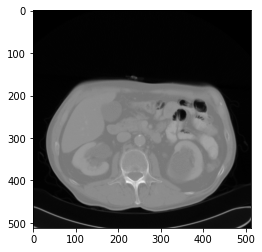

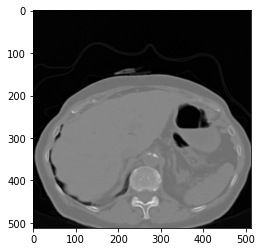

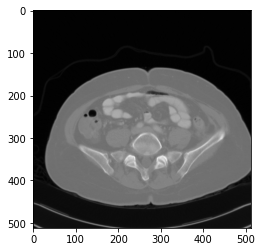

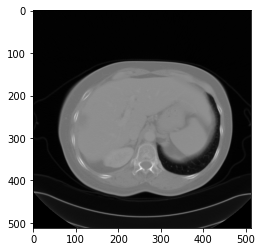

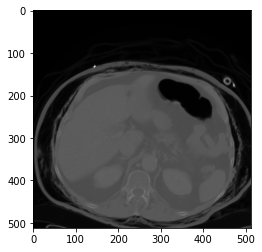

In [19]:
#view cluster 0
visualize_cluster(0,5)

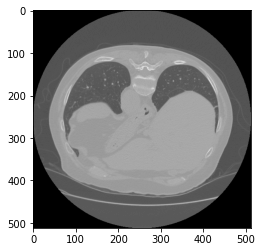

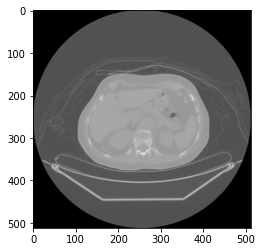

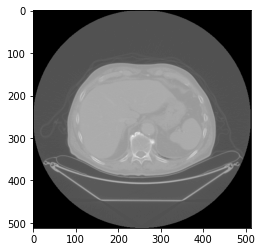

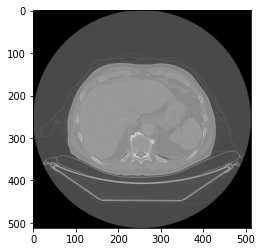

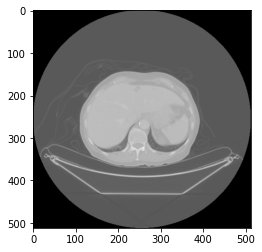

In [20]:
#view cluster 1
visualize_cluster(1,5)

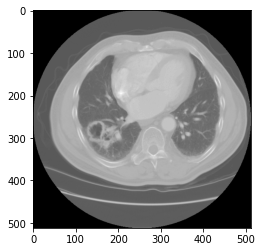

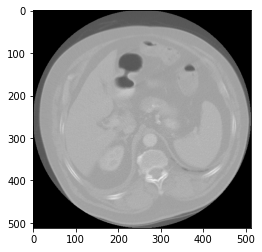

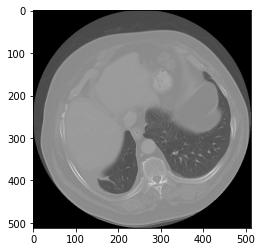

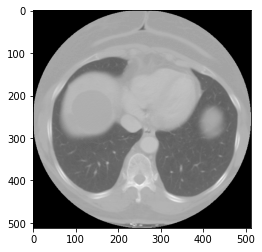

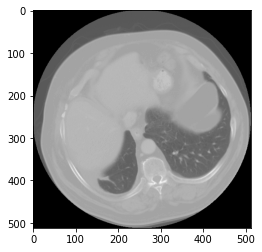

In [21]:
#view cluster 2
visualize_cluster(2,5)

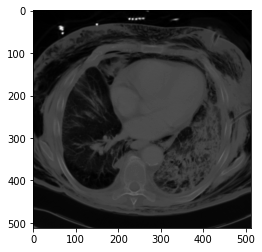

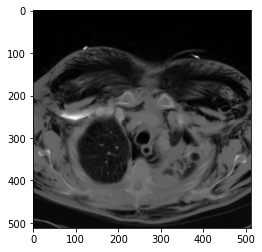

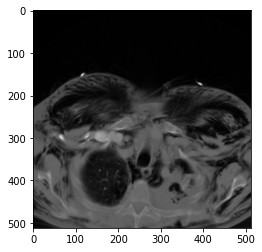

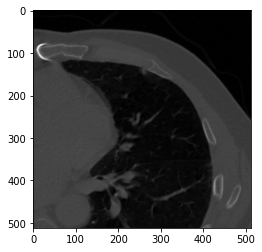

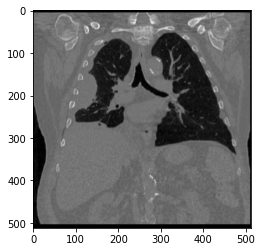

In [22]:
#view cluster 3
visualize_cluster(3,5)

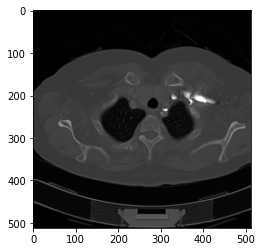

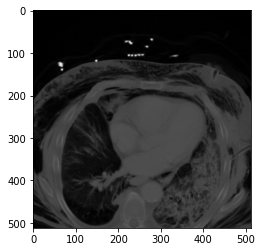

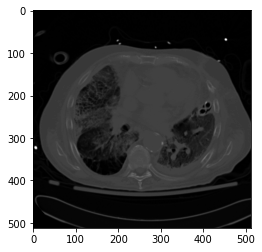

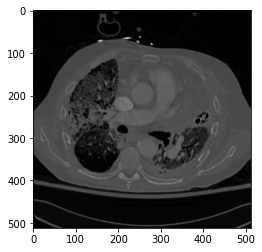

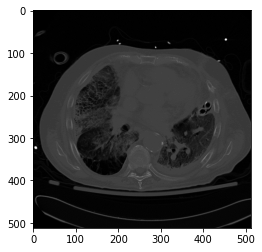

In [23]:
#view cluster 4
visualize_cluster(4,5)

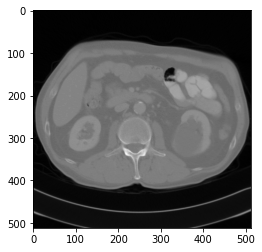

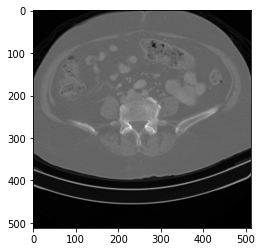

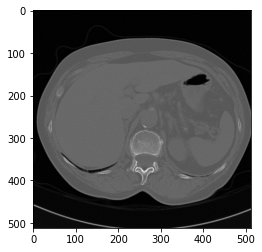

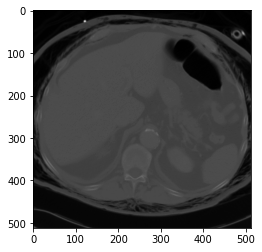

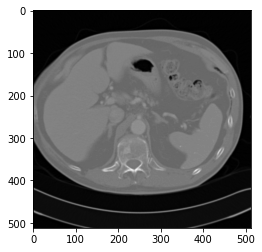

In [24]:
#view cluster 5
visualize_cluster(5,5)

From the visuals above, it can be seen that Kmeans Clustering model classifies:

*   cluster 0 as End Stage Kidney Failure,
*   cluster 1 as Kidney Failure,
*   cluster 2 as Kidney Cancer,
*   cluster 3 as Polycystic Kidney Cancer,
*   cluster 4 as Chronic Kidney Failure, and 
*   cluster 5 as Diabetic Kidney Disease.